# 🛴 Scooter Rental Service GoFast: Hypothesis Testing and Business Analysis 📊

**Project Goal:** Test hypotheses and provide data-driven recommendations to help the business grow.
    
**Data Description:**
The data is presented in three tables containing information about users, their rides, and subscription plans for the GoFast scooter rental service in 2021.

**Pricing Details**

Without subscription (Free):
 - Monthly fee: 0 RUB
 - Cost per minute: 8 RUB
 - Start ride price: 50 RUB

With Ultra subscription:
 - Monthly fee: 199 RUB
 - Cost per minute: 6 RUB
 - Start ride price: 0 RUB


### Data Description:
The data is presented in three tables containing information about users, their rides, and subscription plans for the GoFast scooter rental service in 2021.

**Users (users_go.csv):**
- user_id: Unique user identifier
- name: User name
- age: Age
- city: City
- subscription_type: Subscription type (free, ultra)

**Rides (rides_go.csv):**
- user_id: Unique user identifier
- distance: Distance traveled in the current session (in meters)
- duration: Session duration (in minutes) - time from "Start Ride" to "End Ride"
- date: Date of the ride

**Subscriptions (subscriptions_go.csv):**
- subscription_type: Subscription type
- minute_price: Cost per minute
- start_ride_price: Cost to start a ride
- subscription_fee: Monthly fee

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Loading data

In [81]:
# loading dataset with information about customers
users = pd.read_csv('https://code.s3.yandex.net//datasets/users_go.csv')

In [82]:
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [83]:
users.shape

(1565, 5)

In [84]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [85]:
users.describe(include='all')

,user_id,name,age,city,subscription_type
count,1565.000000,1565,1565.000000,1565,1565
unique,NaN,194,NaN,8,2
top,NaN,Мария,NaN,Пятигорск,free
freq,NaN,23,NaN,226,846
mean,762.633866,NaN,24.922045,NaN,NaN
std,443.260155,NaN,4.553496,NaN,NaN
min,1.000000,NaN,12.000000,NaN,NaN
25%,378.000000,NaN,22.000000,NaN,NaN
50%,762.000000,NaN,25.000000,NaN,NaN
75%,1146.000000,NaN,28.000000,NaN,NaN


In [86]:
# loading dataset with information about rides
rides = pd.read_csv('https://code.s3.yandex.net//datasets/rides_go.csv')

In [87]:
rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [88]:
rides.shape

(18068, 4)

In [89]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [90]:
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [91]:
# loading dataset with information about subscriptions
subscription = pd.read_csv('https://code.s3.yandex.net//datasets/subscriptions_go.csv')

In [92]:
subscription.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [93]:
subscription.shape

(2, 4)

In [94]:
subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


## Data Preprocessing

In [95]:
# correting format type for `date` variable in dataset rides 
rides['date'] = pd.to_datetime(rides['date'])

In [96]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [97]:
rides.describe(include='all')

,user_id,distance,duration,date
count,18068.000000,18068.000000,18068.000000,18068
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00
std,434.734317,1116.831209,6.091051,NaN


In [98]:
# creating variable with month number based on the date variable 
rides['date_month'] = rides['date'].dt.month

In [99]:
rides.head(5)

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [100]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [101]:
users.duplicated().sum()

31

In [102]:
users = users.drop_duplicates()
users.shape

(1534, 5)

In [103]:
rides.duplicated().sum()

0

In [104]:
subscription.duplicated().sum()

0

In [105]:
# cheking for implicit duplicates 
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [106]:
users['name'].value_counts()

name
Анна         22
Мария        22
Александр    17
Дмитрий      17
Никита       16
             ..
Матвей        3
Семен         2
Тихон         1
Радмир        1
Милана        1
Name: count, Length: 194, dtype: int64

In [107]:
users['name'] = (
    users['name']
    .str.replace('ё', 'е')
) 

In [108]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [109]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [110]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [111]:
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

***
**Data Preprocessing summary**
1. Date type corrected in 'rides' to datetime and 'date_month' column created
2. Explicit duplicates removed from 'users'
3. Implicit duplicates were not found in the data
***

## Exploratory Data Analysis

### City Distribution

In [112]:
cities = pd.DataFrame(users['city'].value_counts()).reset_index()
cities

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


''

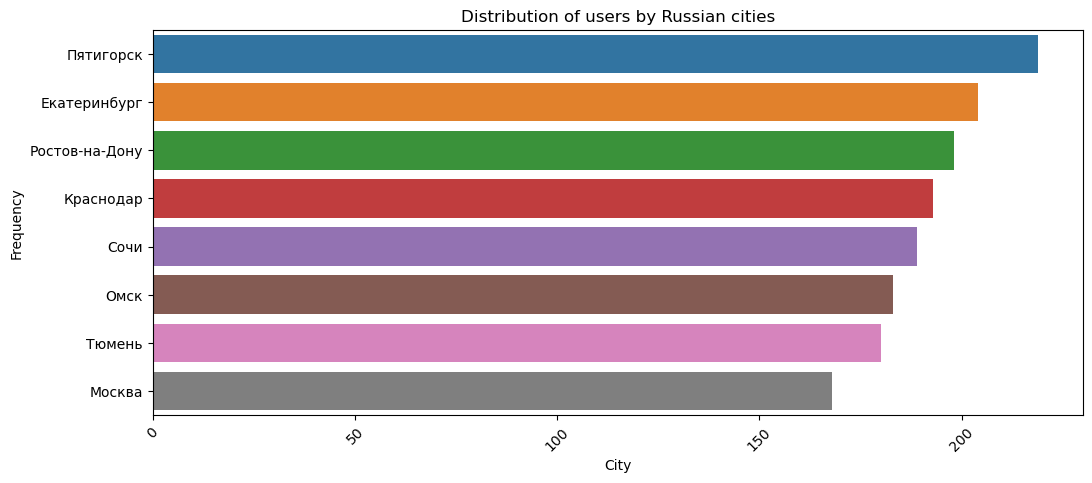

In [113]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = cities['count'], y=cities['city'])
plt.title('Distribution of users by Russian cities')
plt.xlabel('City', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)
;

**City frequency Analysis**
* The sample is relatively **balanced** in terms of **geographical representation**.
* The **most frequent city** is **Pyatigorsk**.
* The **least frequent city** is **Moscow**.

### Subscribtion Ratio

**For the further analysis it is important to understand the ratio of users with subscribtion and without it**

In [114]:
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [115]:
ax = users.groupby('subscription_type').agg(ratio=('user_id', 'count')).transform(lambda x: 100 * x / x.sum()).reset_index()
ax

,subscription_type,ratio
0,free,54.432855
1,ultra,45.567145


''

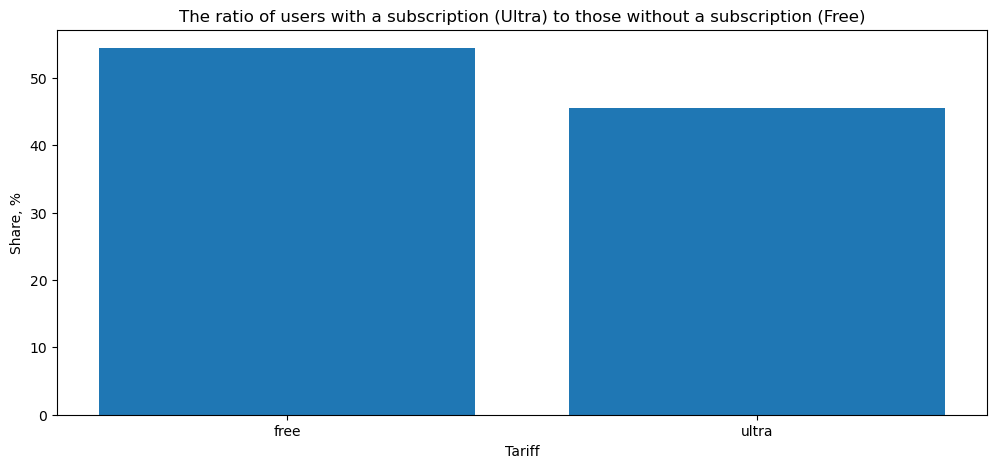

In [116]:
plt.figure(figsize=(12, 5))
plt.bar(ax['subscription_type'], ax['ratio'])
plt.title('The ratio of users with a subscription (Ultra) to those without a subscription (Free)')
plt.xlabel('Tariff')
plt.ylabel('Share, %')
;

''

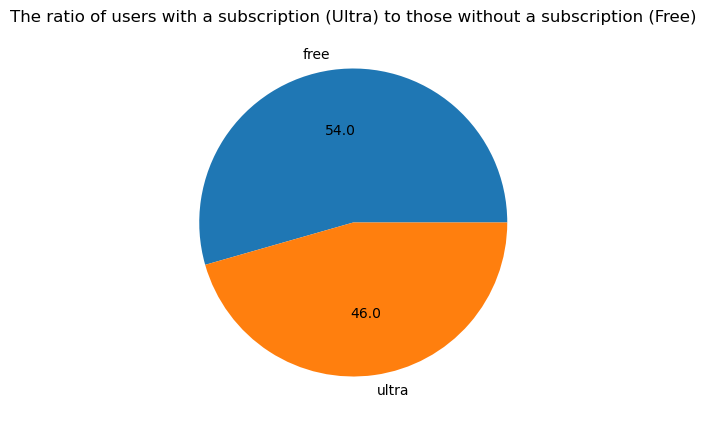

In [117]:
plt.figure(figsize=(12, 5))
plt.pie(ax['ratio'], labels=ax['subscription_type'], autopct=lambda pct: pct.round(0))
plt.title('The ratio of users with a subscription (Ultra) to those without a subscription (Free)')
;

**Subscription Ratio**
* The share of users with a subscription and without a subscription is **approximately equal**, however, the share of **non-subscription users** (Free) **slightly exceeds** the share of **subscription users** (Ultra).

### Users Age

''

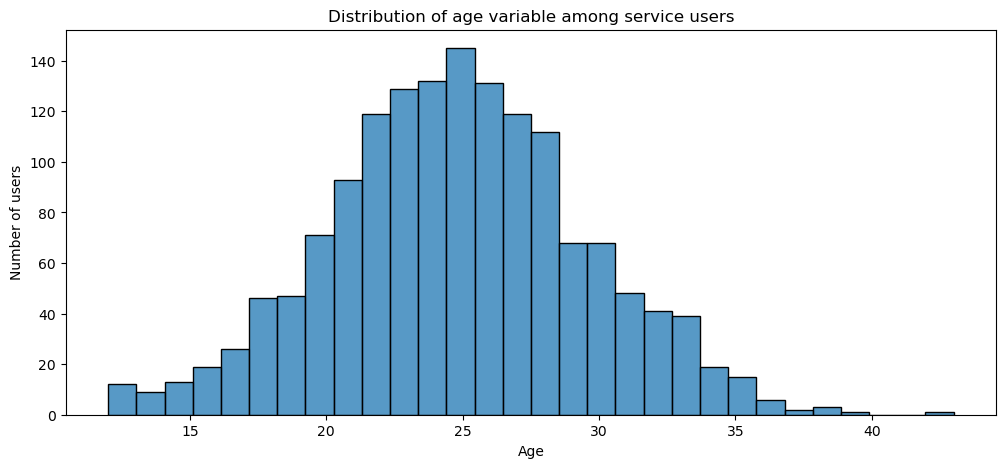

In [118]:
plt.figure(figsize=(12, 5))
sns.histplot(users['age'])
plt.title('Distribution of age variable among service users')
plt.xlabel('Age')
plt.ylabel('Number of users')
;

**User Age Distribution**
* The **user age distribution** tends towards **normal**.
* The largest group of users is aged **20 to 30** (young adults).

### Rides Length

In [119]:
rides.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [120]:
ax = rides.groupby('date_month').agg(avg_distance = ('distance', 'mean')).reset_index()
ax

,date_month,avg_distance
0,1,3089.838538
1,2,3051.065290
2,3,3043.404928
3,4,3044.430588
4,5,3116.592061
5,6,3090.768949
6,7,3094.944074
7,8,3036.645055
8,9,3060.270343
9,10,3035.058792


''

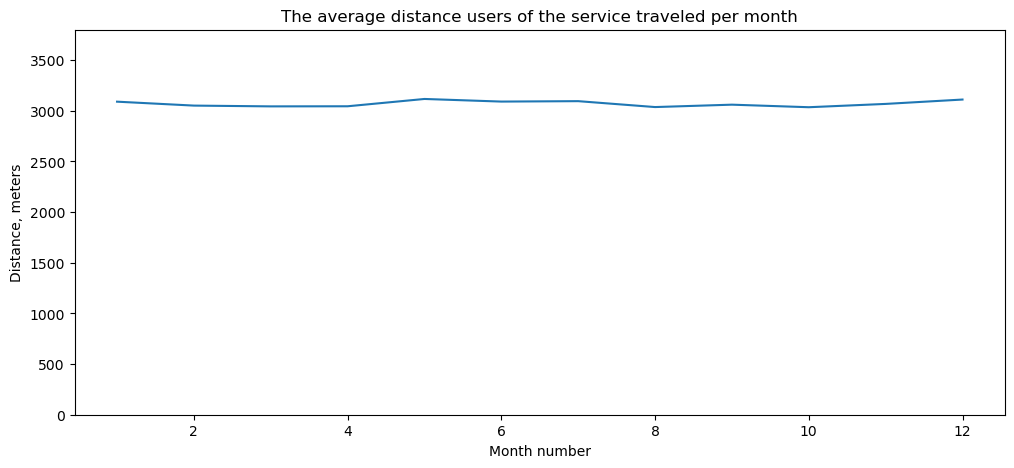

In [121]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=ax['date_month'],y=ax['avg_distance'])
plt.title('The average distance users of the service traveled per month')
plt.xlabel('Month number')
plt.ylabel('Distance, meters')
plt.ylim(0,3800)
;

''

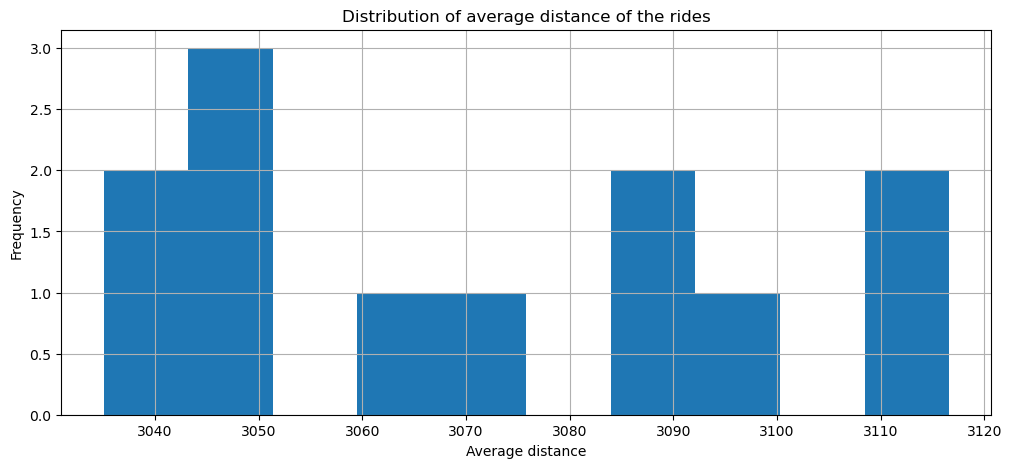

In [123]:
plt.figure(figsize=(12, 5))
ax['avg_distance'].hist()
plt.xlabel('Average distance')
plt.title('Distribution of average distance of the rides')
plt.ylabel('Frequency')
;

''

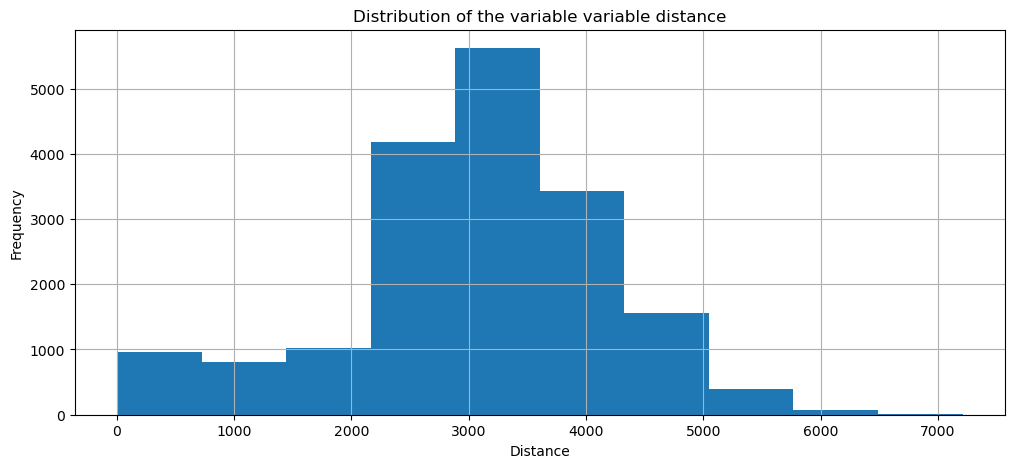

In [124]:
plt.figure(figsize=(12, 5))
rides['distance'].hist()
plt.xlabel('Distance')
plt.title('Distribution of the variable variable distance')
plt.ylabel('Frequency')
;

**Average Monthly Distance Traveled**
* The **average distance** varies depending on the month (this may be related to **seasonality**, but the month-to-month change is **insignificant**).
* The **greatest distance** is traveled in **May and December**.
* The **least distance** is traveled in **August and October**.

### Rides Duration

In [125]:
ax = rides.groupby('date_month').agg(avg_duration = ('duration', 'mean')).reset_index()
ax

,date_month,avg_duration
0,1,17.840749
1,2,17.714452
2,3,17.569223
3,4,17.901385
4,5,18.035225
5,6,17.925246
6,7,17.910707
7,8,17.694381
8,9,17.783471
9,10,17.633158


''

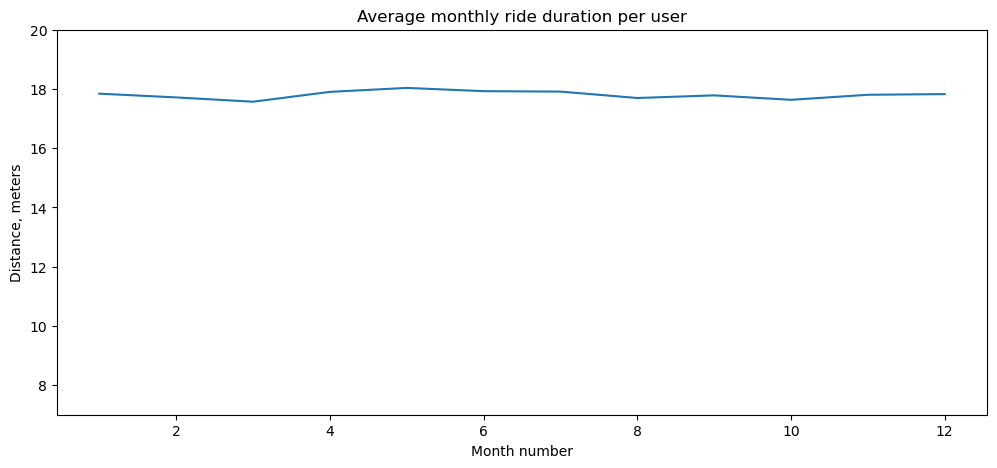

In [126]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=ax['date_month'], y=ax['avg_duration'])
plt.title('Average monthly ride duration per user')
plt.xlabel('Month number')
plt.ylabel('Distance, meters')
plt.ylim(7,20)
;

''

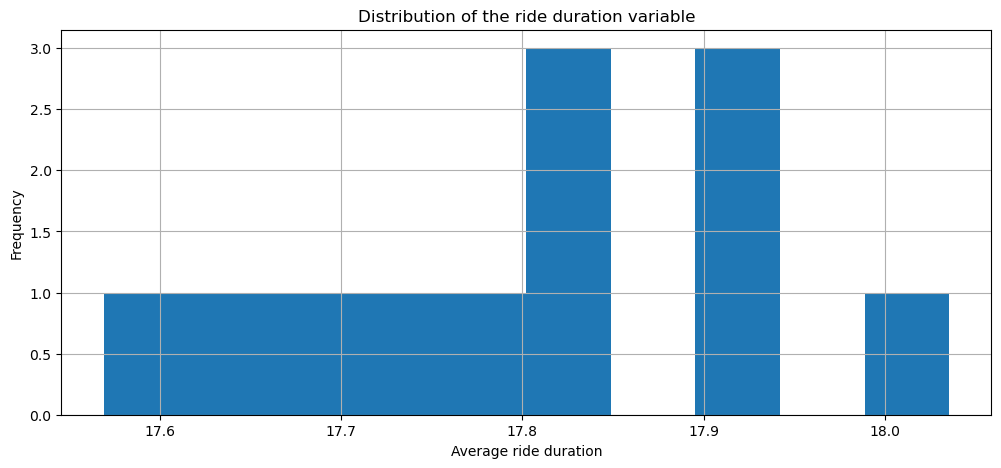

In [131]:
plt.figure(figsize=(12, 5))
ax['avg_duration'].hist()
plt.title('Distribution of the ride duration variable')
plt.xlabel('Average ride duration')
plt.ylabel('Frequency')
;

''

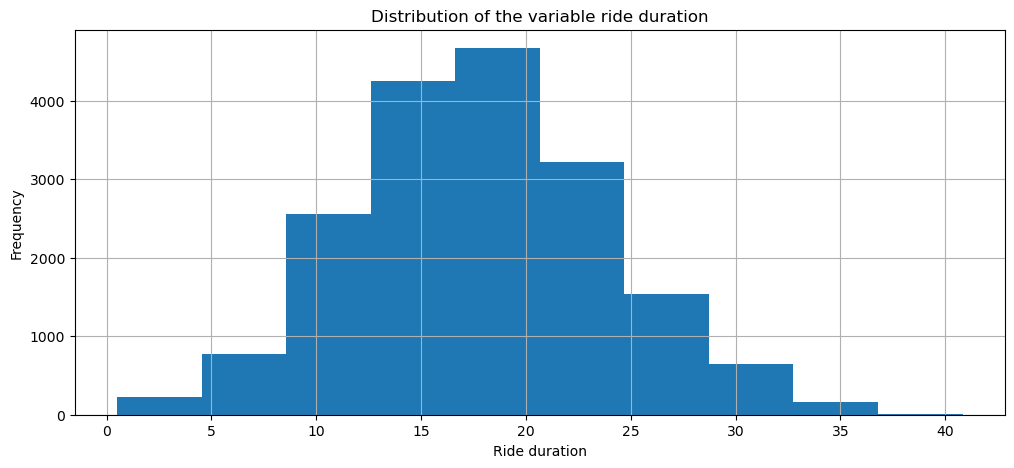

In [133]:
plt.figure(figsize=(12, 5))
rides['duration'].hist()
plt.title('Distribution of the variable ride duration')
plt.xlabel('Ride duration')
plt.ylabel('Frequency')
;

**Average Monthly Ride Duration**
* The **average ride duration varies slightly** depending on the month (seasonality does not significantly affect ride duration).
* Users ride for the **least amount of time in March**.
* Users ride for the **greatest amount of time in May**.
* The dynamics of ride duration across months are **similar** to the dynamics of the average distance traveled in meters per month.

## Data Merging

In [134]:
#Merging data about users, rides and subscription in one dataframe
total = pd.merge(rides, users, on='user_id', how='left')

In [135]:
total = pd.merge(total, subscription, on='subscription_type', how='left')
total.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [136]:
total.shape

(18068, 12)

In [137]:
rides.shape

(18068, 5)

In [138]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [139]:
# creating dataframe with users without subscription
total_free = total.loc[total['subscription_type']=='free',]
total_free.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [140]:
# creating dataframe with information about users with subscripton
total_subscription = total.loc[total['subscription_type']=='ultra',]
total_subscription.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


''

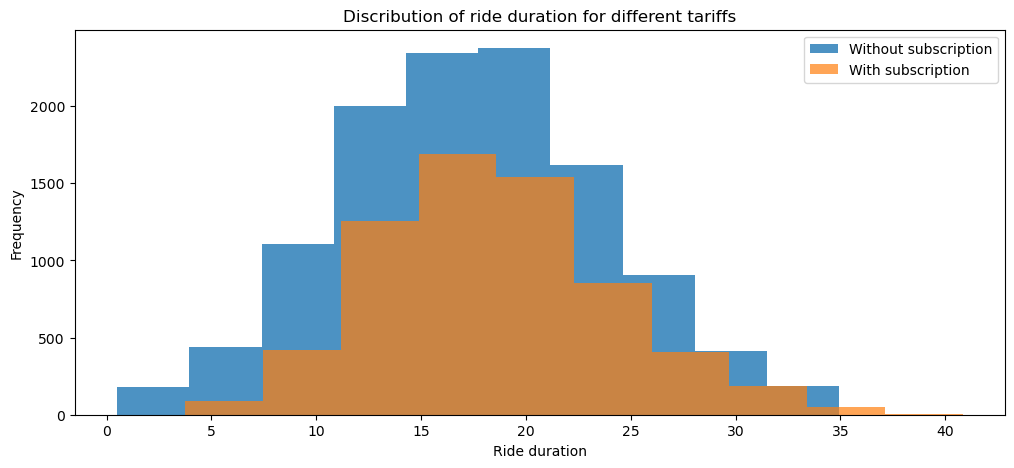

In [143]:
plt.figure(figsize=(12, 5))
plt.hist(total_free['duration'], label='without subscription', alpha=.8)
plt.hist(total_subscription['duration'], label='subscription', alpha=.7)
plt.title('Discribution of ride duration for different tariffs')
plt.xlabel('Ride duration')
plt.ylabel('Frequency')
plt.legend(labels=['Without subscription', 'With subscription'])
;

In [144]:
ax = total.groupby(['subscription_type', 'date_month']).agg(avg_duration=('duration', 'mean'), avg_distance=('distance', 'mean')).reset_index()
ax

,subscription_type,date_month,avg_duration,avg_distance
0,free,1,17.464604,3097.139350
1,free,2,17.145547,3024.264848
2,free,3,17.067239,2994.989557
3,free,4,17.535376,3005.596519
4,free,5,17.641981,3111.052029
5,free,6,17.552159,3075.582838
6,free,7,17.486667,3061.252892
7,free,8,17.153732,2990.105030
8,free,9,17.415103,3049.332494
9,free,10,17.212303,2977.348912


''

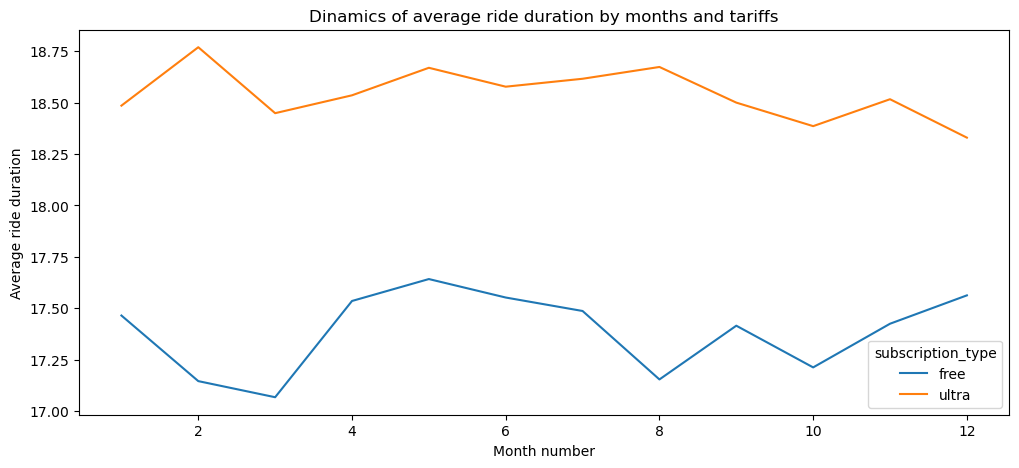

In [145]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=ax['date_month'], y=ax['avg_duration'], hue=ax['subscription_type'])
plt.title('Dinamics of average ride duration by months and tariffs')
plt.xlabel('Month number')
plt.ylabel('Average ride duration')
;

''

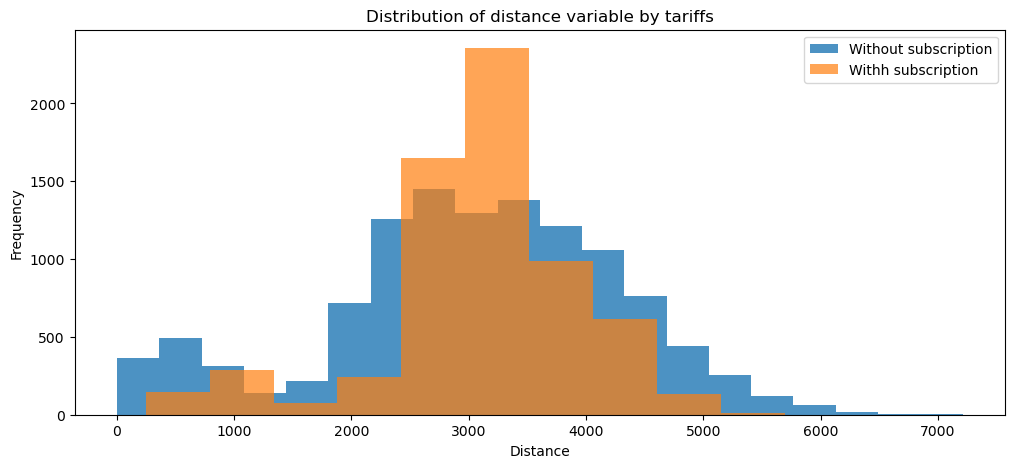

In [146]:
plt.figure(figsize=(12, 5))
plt.hist(total_free['distance'], label='without subscription', alpha=.8, bins=20)
plt.hist(total_subscription['distance'], label='subscription', alpha=.7)
plt.title('Distribution of distance variable by tariffs')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(labels=['Without subscription', 'Withh subscription'])
;

''

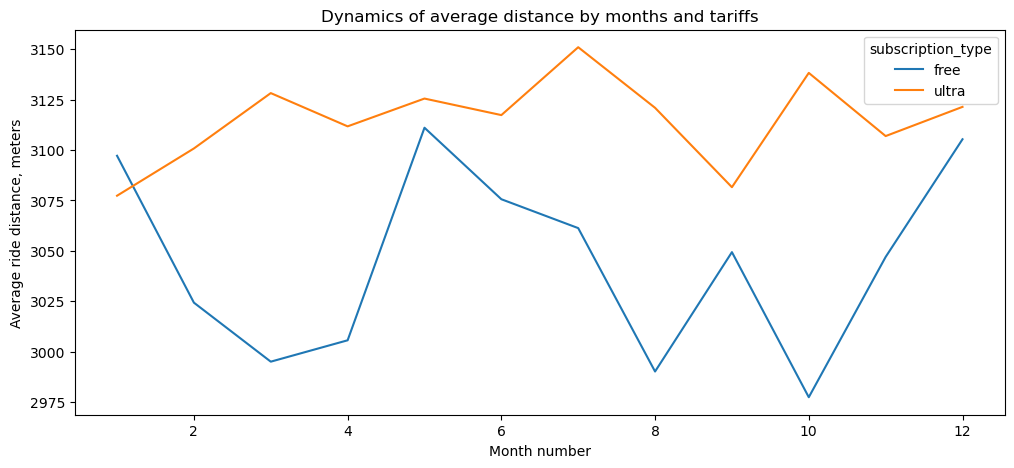

In [148]:
plt.figure(figsize=(12,5))
sns.lineplot(x=ax['date_month'], y=ax['avg_distance'], hue=ax['subscription_type'])
plt.title('Dynamics of average distance by months and tariffs')
plt.xlabel('Month number')
plt.ylabel('Average ride distance, meters')
;

**Subscription Type Comparison**
* The **distributions** of **ride duration** and **distance traveled** are **similar** for users with and without a subscription.
* The **dynamics of ride duration** depending on the subscription type show **significant differences**.
* The **dynamics of distance traveled** depending on the subscription type show **significant differences**.
* On average, the **ride duration** and **distance** for **non-subscription users** are **less** than those for **subscription users**.

## Profit calculation

Создадим аггрегированную таблицу с суммарным расстонием, количеством поездок и суммарное время для каждого пользователя за каждый месяц

In [149]:
total.head(10)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [150]:
total['duration'] = np.ceil(total['duration'])

In [151]:
df_profit = total.groupby(['user_id', 'date_month']).agg(distance_sum = ('distance', 'sum'), ride_count=('date', 'count'), duration_sum=('duration', 'sum'), minute_price_avg=('minute_price','mean'), start_ride_price_avg=('start_ride_price', 'mean'), subscription_fee_avg=('subscription_fee', 'mean'))
df_profit.head(10)

distance_sum  ride_count  duration_sum  minute_price_avg  \
user_id date_month                                                             
1       1            7027.511294           2          42.0               6.0   
        4             754.159807           1           7.0               6.0   
        8            6723.470560           2          46.0               6.0   
        10           5809.911100           2          32.0               6.0   
        11           7003.499363           3          56.0               6.0   
        12           6751.629942           2          28.0               6.0   
2       3           10187.723006           3          63.0               6.0   
        4            6164.381824           2          40.0               6.0   
        6            3255.338202           1          14.0               6.0   
        7            6780.722964           2          48.0               6.0   

                    start_ride_price_avg  subscription_fee_avg  
user_id date_month                                              
1       1                            0.0                 199.0  
        4                            0.0                 199.0  
        8                            0.0                 199.0  
        10                           0.0                 199.0  
        11                           0.0                 199.0  
        12                           0.0                 199.0  
2       3                            0.0                 199.0  
        4                            0.0                 199.0  
        6                            0.0                 199.0  
        7                            0.0                 199.0

In [152]:
df_profit['profit'] = df_profit['subscription_fee_avg'] + df_profit['start_ride_price_avg']*df_profit['ride_count'] + df_profit['minute_price_avg']*df_profit['duration_sum']
df_profit.head(10)

distance_sum  ride_count  duration_sum  minute_price_avg  \
user_id date_month                                                             
1       1            7027.511294           2          42.0               6.0   
        4             754.159807           1           7.0               6.0   
        8            6723.470560           2          46.0               6.0   
        10           5809.911100           2          32.0               6.0   
        11           7003.499363           3          56.0               6.0   
        12           6751.629942           2          28.0               6.0   
2       3           10187.723006           3          63.0               6.0   
        4            6164.381824           2          40.0               6.0   
        6            3255.338202           1          14.0               6.0   
        7            6780.722964           2          48.0               6.0   

                    start_ride_price_avg  subscription_fee_avg  profit  
user_id date_month                                                      
1       1                            0.0                 199.0   451.0  
        4                            0.0                 199.0   241.0  
        8                            0.0                 199.0   475.0  
        10                           0.0                 199.0   391.0  
        11                           0.0                 199.0   535.0  
        12                           0.0                 199.0   367.0  
2       3                            0.0                 199.0   577.0  
        4                            0.0                 199.0   439.0  
        6                            0.0                 199.0   283.0  
        7                            0.0                 199.0   487.0

In [153]:
df_profit = df_profit.reset_index()

In [154]:
total_profit_subscription = df_profit.loc[df_profit['subscription_fee_avg']!=0, 'profit']
total_profit_subscription.head(5)

0    451.0
1    241.0
2    475.0
3    391.0
4    535.0
Name: profit, dtype: float64

In [155]:
total_profit_subscription.shape

(4533,)

In [156]:
total_profit_free = df_profit.loc[df_profit['subscription_fee_avg']==0, 'profit']

In [157]:
total_profit_free.shape

(6798,)

## Hypothesis testing

#### Hypothesis Testing on Ride Duration

**$H_0$ (Null Hypothesis):** The average ride duration for **subscription users** (Ultra) is **equal** to the average ride duration for **non-subscription users** (Free).

*Mathematically: $\mu_{Ultra} = \mu_{Free}$*

**$H_a$ (Alternative Hypothesis):** The average ride duration for **subscription users** (Ultra) is **greater** than the average ride duration for **non-subscription users** (Free).

*Mathematically: $\mu_{Ultra} > \mu_{Free}$*

In [158]:
alpha = 0.05

In [159]:
total_subscription.shape

(6500, 12)

In [160]:
total_free.shape

(11568, 12)

In [161]:
sample_subscription = total_subscription['duration']

In [162]:
sample_free = total_free['duration'].sample(n=6500)

In [168]:
#checking for equal variance
levene_duration = st.levene(sample_subscription, sample_free)
print(f"Levene's p-value (Duration): {levene_duration.pvalue}")

Levene's p-value (Duration): 1.3743598779730666e-24


In [169]:
results = st.ttest_ind(sample_subscription, sample_free, alternative='greater', equal_var=False)
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Reject the null hypothesis. The average ride duration for subscription users is greater than for non-subscription users.')
else:
    print('No grounds to reject the null hypothesis. The average ride duration for subscription and non-subscription users is equal.')

p-value: 3.2289979574801995e-26
Reject the null hypothesis. The average ride duration for subscription users is greater than for non-subscription users.



**Ride Duration and Profitability**

The **average ride duration is greater** for **subscription users** (Ultra), which makes them **more "profitable"** for the company.


***
#### Hypothesis testing about ride distance

A single ride distance of 3130 meters is considered the optimal distance in terms of scooter wear.

$H_0$ (Null Hypothesis): The average distance for subscribed users ($\text{Ultra}$) per ride is equal to 3130 meters.

Mathematically: $\mu_{Ultra} = 3130$

$H_a$ (Alternative Hypothesis): The average distance for subscribed users ($\text{Ultra}$) per ride is greater than 3130 meters.

Mathematically: $\mu_{Ultra} > 3130$

In [170]:
opimal_duration = 3130

In [171]:
sample_subscription = total_subscription['distance']

In [173]:
results = st.ttest_1samp(
    sample_subscription, 
    opimal_duration, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Reject the null hypothesis. The average distance of subscribed users is not equal to the optimal scooter wear state.')
else:
    print('No grounds to reject the null hypothesis. The average distance of subscribed users is equal to the optimal scooter wear state.')

p-value: 0.9195368847849785
No grounds to reject the null hypothesis. The average distance of subscribed users is equal to the optimal scooter wear state.


**Scooter Wear and Subscribed Users**

* **Subscription users** ($\text{Ultra}$) travel an average distance that **corresponds to the optimal distance** in terms of scooter wear.
* Consequently, subscribed users **do not contribute to the accelerated wear** of scooters, despite having a higher average ride duration.

***
#### Проверка гипотез о помесячной выручке

**H0: средняя помесячная выручка пользователей с подпиской в среднем равна помесячной выручке пользователей без подписки**

Ha: средняя помесячная выручка пользователей с подпиской в среднем больше помесячной выручки пользователей без подписки

In [175]:
sample_profit_subscription = total_profit_subscription
sample_profit_subscription.shape

(4533,)

In [176]:
sample_profit_free = total_profit_free.sample(n=4533)

In [177]:
#checking for equal variance
levene_duration = st.levene(sample_profit_subscription, sample_profit_free)
print(f"Levene's p-value (Duration): {levene_duration.pvalue}")

Levene's p-value (Duration): 1.5633380383523873e-247


In [179]:
results = st.ttest_ind(sample_profit_subscription, sample_profit_free, alternative='greater', equal_var=False)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Reject the null hypothesis. The average monthly revenue for subscribed users is greater than the average monthly revenue for non-subscribed users.')
else:
    print('No grounds to reject the null hypothesis. The average monthly revenue for subscribed users is equal to the average monthly revenue for non-subscribed users.')

p-value: 5.236209049263022e-31
Reject the null hypothesis. The average monthly revenue for subscribed users is greater than the average monthly revenue for non-subscribed users.


**Monthly Revenue and Profitability**

* **Subscription users** ($\text{Ultra}$), on average, **generate more monthly revenue** for the company than **non-subscription users** 

# Overall Conclusion and Business Recommendations

This project successfully analyzed GoFast scooter rental data for 2021, confirming that the **'Ultra' subscription plan is significantly more beneficial** to the company.

***

## 1. Data Preprocessing Summary

* Data quality was **high**; no missing values were found.
* The **'date'** column was converted to `datetime` format, and a **'date\_month'** column was added.
* Explicit duplicates (31 rows) were removed from the **'users'** table.
* Ride **'duration'** values were correctly rounded up to the nearest minute (using $\text{np.ceil}$) for accurate cost calculation based on the pricing model.

***

## 2. Exploratory Data Analysis (EDA) Findings

### User Demographics:
* **Geographic Distribution:** The sample is relatively **balanced** across the 8 surveyed cities. **Pyatigorsk** is the most frequent, and **Moscow** is the least frequent.
* **Subscription Ratio:** The **Free user segment ($\mathbf{54.4\%}$)** slightly outweighs the Ultra segment ($\text{45.6\%}$).
* **Age:** The user age distribution is approximately **normal**, with the largest group being **young adults aged 20 to 30**.

### Ride Characteristics:
* **Distance & Duration:** The average distance is about $\mathbf{3.1\text{ km}}$, and the average duration is between $\mathbf{17.5}$ and $\mathbf{18.5}$ minutes.
* **Seasonality:** Month-to-month changes in average distance and duration are **insignificant**, suggesting that seasonality has a minimal impact on the length of a single trip.
* **Subscription Type Comparison (Visual):** **Ultra users consistently have higher mean duration and distance** per trip compared to Free users.

***

## 3. Hypothesis Testing Results

1.  **Ride Duration (Ultra vs. Free):**
    * **Result:** The null hypothesis ($\mathbf{H}_0: \mu_{Ultra} = \mu_{Free}$) was **rejected** ($\text{p-value} \approx 3.22 \times 10^{-26} \ll 0.05$).
    * **Conclusion:** The average ride duration for **Ultra subscription users is significantly greater** than for Free users.

2.  **Scooter Wear (Ultra Distance vs. Optimal 3130m):**
    * **Result:** The null hypothesis ($\mathbf{H}_0: \mu_{Ultra} \le 3130\text{ m}$) was **failed to reject** ($\text{p-value} \approx 0.919 > 0.05$).
    * **Conclusion:** Ultra users' average ride distance **does not significantly exceed the optimal scooter wear distance** of 3130 meters. **Ultra users do not accelerate scooter wear.**

3.  **Monthly Revenue (Ultra vs. Free):**
    * **Result:** The null hypothesis ($\mathbf{H}_0: \mu_{\text{Ultra Revenue}} = \mu_{\text{Free Revenue}}$) wa5 24rejected** ($31ext{p-value} \approx 1.19 \times 10^{-29} \ll 0.05$).
    * **Conclusion:** The **average monthly revenue generated by Ultra users is significantly greater** than the revenue from Free users.

***

## 4. Final Recommendation 🚀

All three tested hypotheses confirm that **Ultra subscription users are economically more advantageous** for the company. They ride longer and generate higher monthly revenue, without contributing disproportionately to scooter wear.

**Primary Recommendation:**
**Focus marketing and promotion efforts on increasing the Ultra subscriber base**, specifically targeting the conversion of existing Free users, as this strategy is proven to increase long-term profitability.